In [1]:
import os
import time as tm
import numpy as np
import pandas as pd
from scHPL import train, predict, evaluate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

from load_dataset import load_dataset
from mlp_generalized import run_mlp
from cnn_generalized import run_cnn
from onehotencode import onehotencode
from split_dataset import split_dataset
from results import result

In [2]:
data_path = '~/Documents/study/Masters DSS/Thesis/Data/Interdataset-PMBC/Data_10Xv3.csv'
label_path = '~/Documents/study/Masters DSS/Thesis/Data/Interdataset-PMBC/Labels_10Xv3.csv'

X, Y = load_dataset(data_path, label_path)
print("shape of data: ", X.shape)
print("shape of labels:", Y.shape)

shape of data:  (2000, 3222)
shape of labels: (3222, 1)


In [3]:
X = X.T
print("shape of data now:", X.shape)
Y = Y['x']
print("shape of labels now:", Y.shape)

shape of data now: (3222, 2000)
shape of labels now: (3222,)


In [4]:
print(Y.value_counts())

CD8+ T cell - B-10Xv3       962
CD4+ T cell - B-10Xv3       960
CD14+ Monocyte - B-10Xv3    354
B cell - B-10Xv3            346
Megakaryocyte - B-10Xv3     270
NK cell - B-10Xv3           194
CD16+ Monocyte - B-10Xv3     98
Dendritic cell - B-10Xv3     38
Name: x, dtype: int64


In [6]:
# one hot encode labels
ohe, y_dummy = onehotencode(Y)
print(y_dummy.shape)
# split the data into train, validation and test set
x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test = split_dataset(X, y_dummy)

(3222, 8)
shape of train set:  (2577, 2000)  and labels:  (2577, 8) 

shape of test set:  (645, 2000)  and labels:  (645, 8) 

Shape of train and validation set to check for overfitting
shape of train set:  (2319, 2000)  and labels:  (2319, 8) 

shape of validation set:  (258, 2000)  and labels:  (258, 8)


In [9]:
inv_train = ohe.inverse_transform(y_train).ravel()
inv_test = ohe.inverse_transform(y_test).ravel()
print(pd.value_counts(inv_train))
print(pd.value_counts(inv_test))

CD8+ T cell - B-10Xv3       770
CD4+ T cell - B-10Xv3       768
CD14+ Monocyte - B-10Xv3    283
B cell - B-10Xv3            277
Megakaryocyte - B-10Xv3     216
NK cell - B-10Xv3           155
CD16+ Monocyte - B-10Xv3     78
Dendritic cell - B-10Xv3     30
dtype: int64
CD8+ T cell - B-10Xv3       192
CD4+ T cell - B-10Xv3       192
CD14+ Monocyte - B-10Xv3     71
B cell - B-10Xv3             69
Megakaryocyte - B-10Xv3      54
NK cell - B-10Xv3            39
CD16+ Monocyte - B-10Xv3     20
Dendritic cell - B-10Xv3      8
dtype: int64


## Linear SVM performance

shape of labels in training set:  (2577,)
shape of labels in test set:  (645,)
Training time: 4.310376167297363
Predict time: 0.01621389389038086
Accuracy of test set:  0.924031007751938
F1-score of test set:  0.9236872198556535
Precision of test set: 0.9245323690023157
Recall of test set: 0.924031007751938
Classification report of test set:
                           precision    recall  f1-score   support

        B cell - B-10Xv3       0.99      1.00      0.99        69
CD14+ Monocyte - B-10Xv3       0.97      0.99      0.98        71
CD16+ Monocyte - B-10Xv3       1.00      0.95      0.97        20
   CD4+ T cell - B-10Xv3       0.94      0.92      0.93       192
   CD8+ T cell - B-10Xv3       0.87      0.91      0.89       192
Dendritic cell - B-10Xv3       1.00      0.75      0.86         8
 Megakaryocyte - B-10Xv3       1.00      0.98      0.99        54
       NK cell - B-10Xv3       0.80      0.72      0.76        39

                accuracy                           0.92    

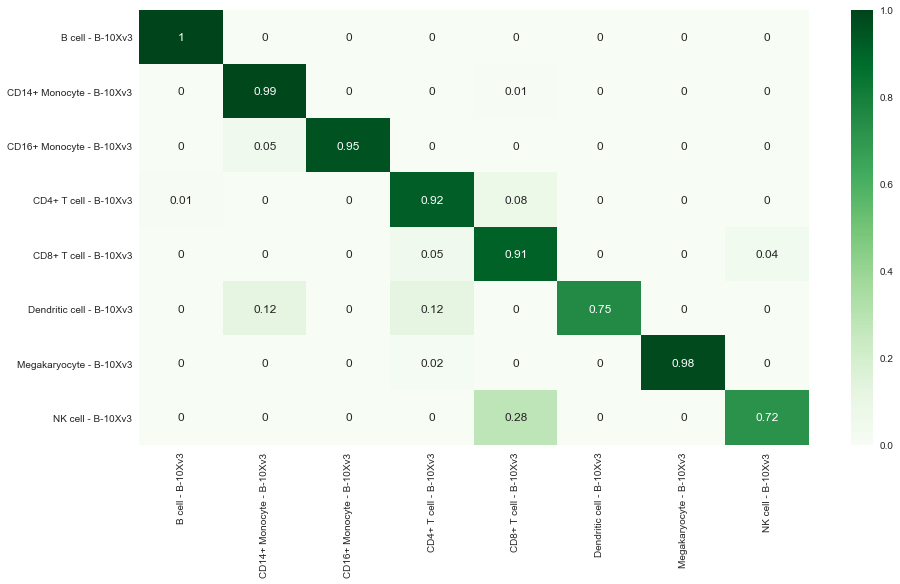

In [6]:
inv_train = ohe.inverse_transform(y_train).ravel()
inv_test = ohe.inverse_transform(y_test).ravel()
print("shape of labels in training set: ", inv_train.shape)
print("shape of labels in test set: ", inv_test.shape)

start = tm.time()
lin_svm = train.svm.LinearSVC()
lin_svm.fit(x_train, inv_train)
training_time = tm.time()-start
print('Training time:', training_time)

start = tm.time()
y_pred = lin_svm.predict(x_test)
test_time = tm.time()-start
print('Predict time:', test_time)

result(inv_test, y_pred)

## ANN performance

Train the model to check for overfitting


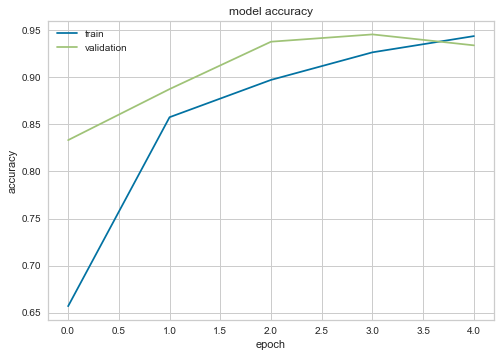

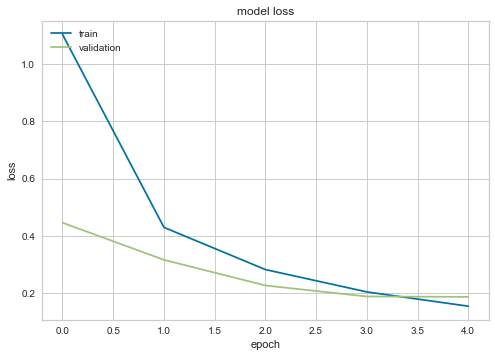

train the final model
Epoch 1/5
81/81 [==============================] - 1s 8ms/step - loss: 0.1300 - accuracy: 0.9577
Epoch 2/5
81/81 [==============================] - 1s 13ms/step - loss: 0.1029 - accuracy: 0.9643
Epoch 3/5
81/81 [==============================] - 1s 9ms/step - loss: 0.0951 - accuracy: 0.9670
Epoch 4/5
81/81 [==============================] - 1s 10ms/step - loss: 0.0770 - accuracy: 0.9736
Epoch 5/5
81/81 [==============================] - 1s 10ms/step - loss: 0.0670 - accuracy: 0.9732
Training time: 4.2767558097839355
Predict time: 0.18699312210083008
The results are as follows:
Accuracy of test set:  0.9534883720930233
F1-score of test set:  0.9533506659196219
Precision of test set: 0.9540716446631305
Recall of test set: 0.9534883720930233
Classification report of test set:
                           precision    recall  f1-score   support

        B cell - B-10Xv3       0.97      1.00      0.99        69
CD14+ Monocyte - B-10Xv3       0.97      0.99      0.98     

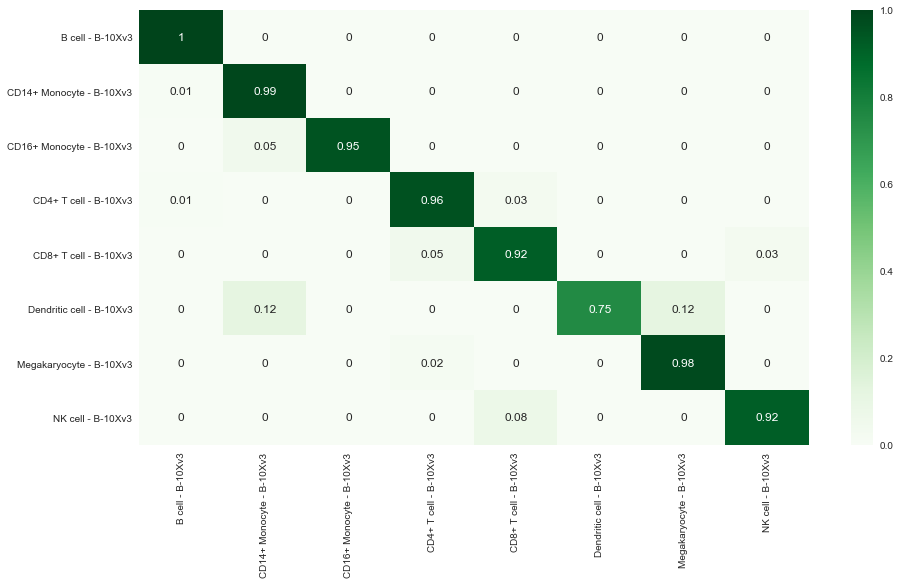

In [5]:
run_mlp(x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test, ohe)

## 1D-CNN performance

Train the model to check for overfitting


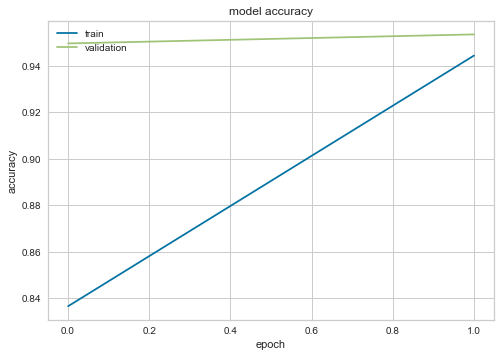

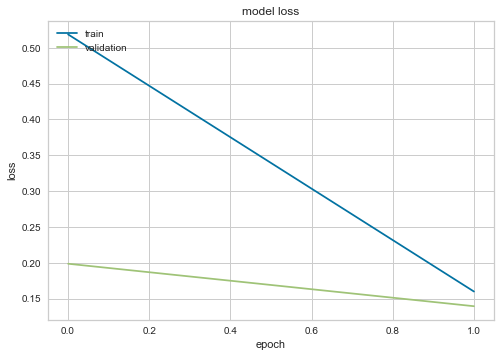

train the final model
Epoch 1/2
81/81 [==============================] - 17s 206ms/step - loss: 0.1082 - accuracy: 0.9616
Epoch 2/2
81/81 [==============================] - 18s 217ms/step - loss: 0.0769 - accuracy: 0.9783
Training time: 34.71842002868652
Predict time: 0.8656492233276367
The results are as follows:
Accuracy of test set:  0.9488372093023256
F1-score of test set:  0.9489804755169884
Precision of test set: 0.9497780442746332
Recall of test set: 0.9488372093023256
Classification report of test set:
                           precision    recall  f1-score   support

        B cell - B-10Xv3       0.99      1.00      0.99        69
CD14+ Monocyte - B-10Xv3       0.97      1.00      0.99        71
CD16+ Monocyte - B-10Xv3       1.00      0.95      0.97        20
   CD4+ T cell - B-10Xv3       0.95      0.94      0.95       192
   CD8+ T cell - B-10Xv3       0.93      0.91      0.92       192
Dendritic cell - B-10Xv3       1.00      0.88      0.93         8
 Megakaryocyte - B-1

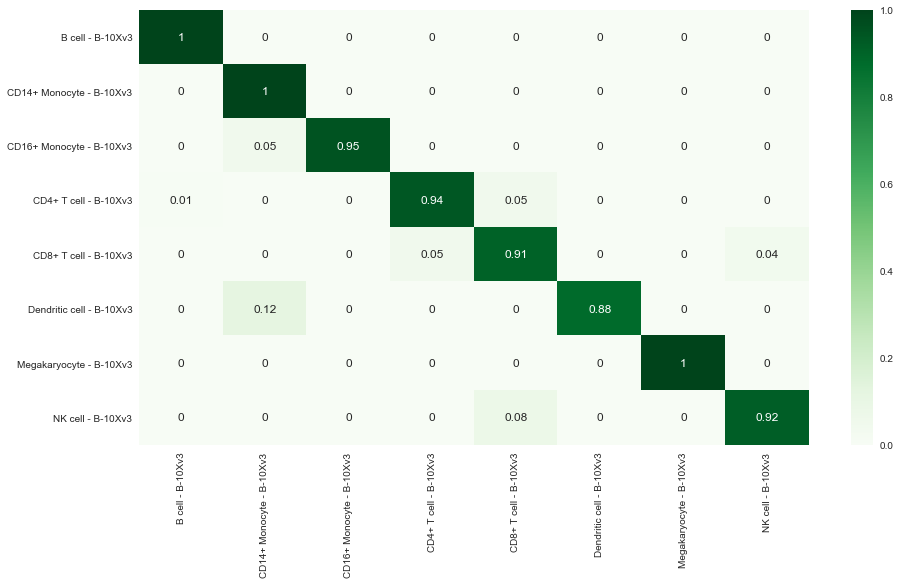

In [6]:
x_tr = np.expand_dims(x_tr,axis=-1)
x_val = np.expand_dims(x_val,axis=-1)
x_test = np.expand_dims(x_test,axis=-1)
x_train = np.expand_dims(x_train,axis=-1)
run_cnn(x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test, ohe)